# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/yenmi/Desktop/insurance2.csv')

In [12]:
medical.shape

(1338, 8)

In [13]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

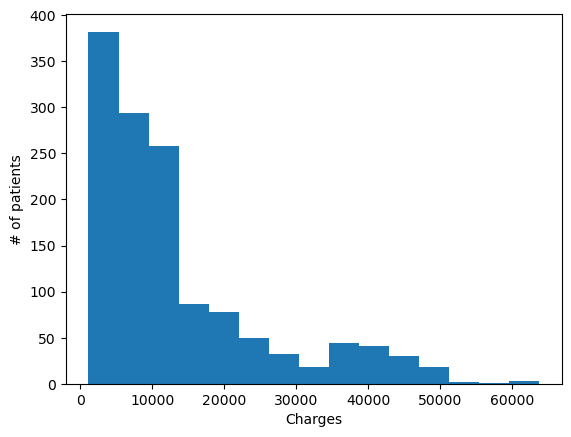

In [16]:
charges = medical['charges']
plt.hist(charges, bins=15)
plt.xlabel('Charges')
plt.ylabel('# of patients')
plt.show()

In [17]:
charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [20]:
# We can bootstrap the data to find the most statistically probably mean.
# Here, we take 100 samples from the data, get the mean, and repeat 10,000 times. We plot all of the means and find:
# The mean of all of means is $13,290 which is above the $12,000 threshold.
# The standard deviation is $1210, so 68% of the means lie between $12,080 and $14,500.
# So within 1 standard deviation, we are stil above the $12,000 threshold
def bootstrap_sample(n_trials, sample_size):
    sample = np.empty(n_trials)
    for i in range(n_trials):
        sample[i] = np.mean(np.random.choice(charges, sample_size))
    return sample

s = bootstrap_sample(10000, 100)
mean = np.mean(s)
std = np.std(s)
print(mean, std)

13255.418979362965 1206.84059781385


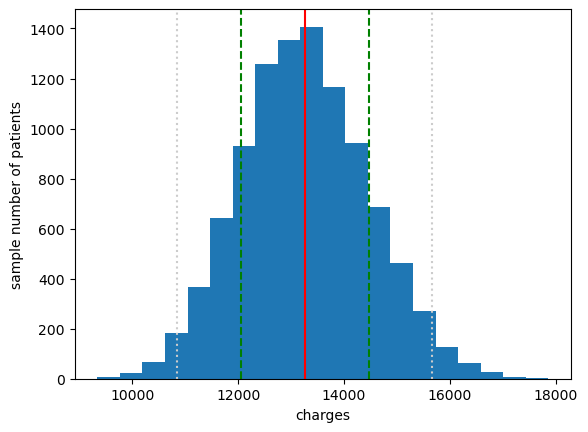

In [21]:
plt.hist(s, bins=20)
plt.xlabel('charges')
plt.ylabel('sample number of patients')
plt.axvline(mean, color='r', linestyle='-')
plt.axvline(mean + std, color='g', linestyle='--')
plt.axvline(mean - std, color='g', linestyle='--')
plt.axvline(mean + 2*std, color='0.8', linestyle=':')
plt.axvline(mean - 2*std, color='0.8', linestyle=':')
plt.show()

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [24]:
# We just need a one-sided confidence interval because
# we are only concerned with the lower limit and whether it surpasses the $12,000 threshold (it does)

In [25]:
# Calculate the critical value and the relevant 95% confidence interval for the mean
# Confidence interval (aka the range between the upper and lower bounds) = (mean value) +- (z-value for confidence level) * (std)/sqrt(samplesize)
# for 95% confidence level, z-value is 1.96

# mean = 13920
# std = 1210
# sample size = 100
value = 1.96*std/np.sqrt(100)
upper = mean + value
lower = mean - value
print("Upper and lower bounds:", lower, upper)
print("Range:", upper-lower)

# I am confused. According to the formula to find the 95% confidence level, the range is TINY and nowhere near 2 stanard deviations??
# The pink lines should be near the grey lines, right?

Upper and lower bounds: 13018.87822219145 13491.95973653448
Range: 473.08151434303


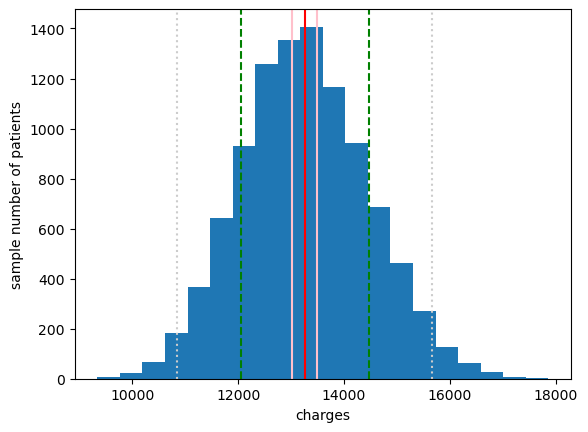

In [26]:
plt.hist(s, bins=20)
plt.xlabel('charges')
plt.ylabel('sample number of patients')
plt.axvline(mean, color='r', linestyle='-')
plt.axvline(mean + std, color='g', linestyle='--')
plt.axvline(mean - std, color='g', linestyle='--')
plt.axvline(mean + 2*std, color='0.8', linestyle=':')
plt.axvline(mean - 2*std, color='0.8', linestyle=':')
plt.axvline(lower, color='pink', linestyle='-')
plt.axvline(upper, color='pink', linestyle='-')
plt.show()

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [29]:
# Null hypothesis: People with and without insurance are not being charged differently, based on their insurance policy.
# Alternate hypothesis: People with insurance are being charged differently compared to those without insurance.

# Note: we are trying to see if two means are not equal to each other.
# This is a 2-tail hypothesis test

# We are assuming that the variance of each group are the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

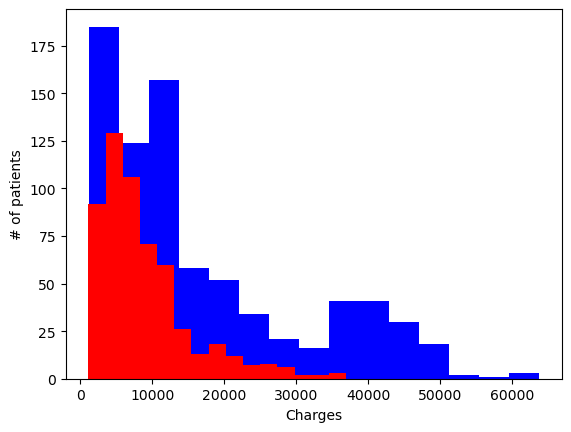

In [32]:
yesInsurance = medical[medical["insuranceclaim"]==1]
noInsurance = medical[medical["insuranceclaim"]==0]
yesCharges = yesInsurance['charges']
noCharges = noInsurance['charges']

plt.hist(yesCharges, bins=15, color='blue', label='with insurance')
plt.hist(noCharges, bins=15, color='red', label='no insurance')

plt.xlabel('Charges')
plt.ylabel('# of patients')
plt.show()

In [33]:
yesCharges.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

In [34]:
noCharges.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

In [35]:
def collect_sample(data, n_trials, sample_size):
    sample = np.empty(n_trials)
    for i in range(n_trials):
        sample[i] = np.mean(np.random.choice(data, sample_size))
    return sample

size=500

yes_sample = collect_sample(yesCharges, 10000, size)
yes_mean = np.mean(yes_sample)
yes_std = np.std(yes_sample)
print("With insurance-- Mean:", yes_mean, "STD:", yes_std)

no_sample = collect_sample(noCharges, 10000, size)
no_mean = np.mean(no_sample)
no_std = np.std(no_sample)
print("Without insurance-- Mean:", no_mean, "STD:", no_std)

With insurance-- Mean: 16417.597803702432 STD: 634.2240110226603
Without insurance-- Mean: 8821.305402678743 STD: 288.6791462490577


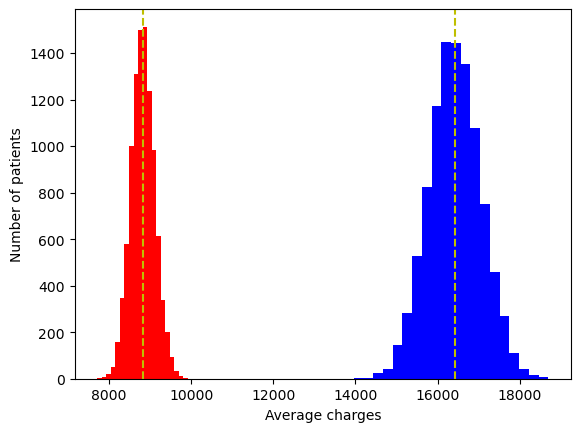

In [36]:
plt.hist(yes_sample, bins=20, color='blue', label='with insurance')
plt.hist(no_sample, bins=20, color='red', label='without insurance')
plt.xlabel('Average charges')
plt.ylabel('Number of patients')
plt.axvline(yes_mean, color='y', linestyle='--')
plt.axvline(no_mean, color='y', linestyle='--')
plt.show()

In [72]:
# Find the T-test statistic from the original sample
import scipy.stats
# pooled standard deviation
numerator = (yesCharges.count()-1)*yesCharges.std()**2 + (noCharges.count()-1)*noCharges.std()**2
denominator = yesCharges.count() + noCharges.count() - 2

pooledSTD = np.sqrt(numerator/denominator)

# T-test statistic
tTest = (yesCharges.mean() - noCharges.mean())/(pooledSTD*np.sqrt(1/yesCharges.count() + 1/noCharges.count()))
print("t-test statistic:", tTest)

t-test statistic: 11.893299030876715


In [38]:
print("Scipy stats t-test statistic:", scipy.stats.ttest_ind(yesCharges, noCharges, nan_policy="omit"))
# Manual calculation is the same as the scipy.stats function! :D
# pvalue is not less than 0.05. Reject the null hypothesis. Ergo, there IS a difference.

Scipy stats t-test statistic: TtestResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test